In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import gc
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

from tqdm.auto import tqdm
# tqdm : 진행상황 표시 라이브러리
# 특정 함수만 가지고 오고 싶은데 from ~ import ~ 사용

### Q1. Q2에서 했던 histogram을 보면, 자연스럽지 않은 분포를 보이는 값들을 볼 수 있다. 5.0을 넘는 모든 데이터를 삭제하고 다시 모델을 학습하여 평가하는 코드를 작성하고, 결과로 출력된 RMSE값이 왜 변하는지에 대해서 서술하세요.



(20640, 9)
(19675, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

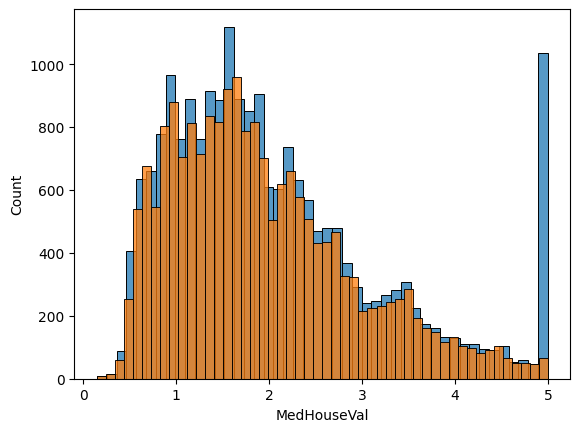

In [15]:
# 기존 데이터 불러오기
housing = fetch_california_housing(as_frame=True)
data = housing.frame
data02 = data[data['MedHouseVal'] <= 5.0]

description = housing.DESCR

# data 크기 출력
print(data.shape)
print(data02.shape)

# histogram 출력
sns.histplot(data['MedHouseVal'])
sns.histplot(data02['MedHouseVal'])

## display(data)
display(data02)
print(description)


##필터링을 하기 전 RMSE

In [16]:
# 필터링을 하기전 RMSE
# 데이터 분할에 사용할 데이터 정의
X = data.drop('MedHouseVal', axis=1) # feature vector
y = data['MedHouseVal'] # target value

# train_test_split 함수 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델 선언하기
model = LinearRegression()

# 모델 학습하기
model.fit(X_train, y_train)

train_preds = model.predict(X_train) # 모델의 학습 데이터 예측값
test_preds  = model.predict(X_test)  # 모델의 테스트 데이터 예측값

train_rmse =  np.sqrt(mean_squared_error(y_train, train_preds)) # 학습 데이터로 평가한 RMSE
test_rmse  =  np.sqrt(mean_squared_error(y_test, test_preds))   # 테스트 데이터로 평가한 RMSE

print("Train RMSE : %.4f" % train_rmse)
print("Test RMSE : %.4f" % test_rmse)


(16512, 8) (4128, 8) (16512,) (4128,)
Train RMSE : 0.7197
Test RMSE : 0.7456


## 필터링을 한 후 RMSE

In [17]:
# 필터링을 하기전 RMSE
# 데이터 분할에 사용할 데이터 정의
X = data02.drop('MedHouseVal', axis=1) # feature vector
y = data02['MedHouseVal'] # target value

# train_test_split 함수 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델 선언하기
model = LinearRegression()

# 모델 학습하기
model.fit(X_train, y_train)

train_preds = model.predict(X_train) # 모델의 학습 데이터 예측값
test_preds  = model.predict(X_test)  # 모델의 테스트 데이터 예측값

train_rmse =  np.sqrt(mean_squared_error(y_train, train_preds)) # 학습 데이터로 평가한 RMSE
test_rmse  =  np.sqrt(mean_squared_error(y_test, test_preds))   # 테스트 데이터로 평가한 RMSE

print("Train RMSE : %.4f" % train_rmse)
print("Test RMSE : %.4f" % test_rmse)

(15740, 8) (3935, 8) (15740,) (3935,)
Train RMSE : 0.6381
Test RMSE : 0.6511


5.0을 넘는 데이터를 제거할 경우 왜 RMSE가 개선되는지 설명하자면 5.0 이상의 값들은 상당히 높은 가격대로 해당 값들이 모델의 예측을 왜곡시켰었던 것입니다. 이러한 값들을 제거하면 모델이 더 일반적인 패턴을 학습하게 되어 전반적인 예측성능이 향상되었다고 볼 수 있습니다.

### Q2. 2주차 실습에서는 Linear Regression을 사용하고 있습니다. 이 모델을 Random Forest로 바꿔보세요. Random Forest 모델을 사용할 때, hyper-parameter는 모두 기본값을 사용합니다. 그리고 RMSE를 측정해보고 성능의 변화가 있다면 왜 그런 변화가 생겼을지 생각해보고, 결과에 대해 생각을 정리해서 작성해주세요.

In [18]:
X = data.drop('MedHouseVal', axis = 1)
y = data['MedHouseVal']

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("Train RMSE : %.4f" % train_rmse)
print("Test RMSE : %.4f" % test_rmse)

Train RMSE : 0.1709
Test RMSE : 0.4726


RMSE가 더 줄어든 것으로 보아 더 좋은 성능을 보이고 있습니다. 이 원인에 대해 생각해보자면 주택 가격을 결정하는 변수들은 서로 복잡한 비선형 관계를 가지는데 이를 더 이해하고 예측했다고 생각됩니다. 또한, 여러 결정 트리를 앙상블하기에 과적합을 줄이고 트리 기반 모델이기에 극값들에 덜 민감하다고 볼 수 있습니다.